# Import Dataset

In [145]:
import pandas as pd

df = pd.read_csv("./dataset/dataset_final.csv")
df.head()

,GENHLTH,MENTHLTH,CHECKUP1,EXERANY2,BPHIGH6,TOLDHI3,DIABETE4,_AGE80,WEIGHT2,HEIGHT3,...,AVEDRNK3,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,SEXVAR,CVD
0,Very Good,10.0,Within the past year,Yes,Yes,Yes,Yes,62.0,88.43537414965986,162.56,...,3.0,6.0,12.0,20.0,3.0,16.0,8.0,20.0,Female,False
1,Good,5.0,Within the past year,Yes,Yes,No,No,65.0,108.84353741496598,165.1,...,2.0,2.0,30.0,Never,8.0,8.0,12.0,16.0,Female,False
2,Fair,5.0,Within the past year,Yes,No,No,No,66.0,84.80725623582767,165.1,...,1.0,1.0,60.0,4.0,1.0,2.0,8.0,60.0,Female,False
3,Don't Know,Don't Know,Within the past 2 years,Yes,Yes,Yes,Yes,68.0,65.75963718820861,165.1,...,Refused,Refused,Never,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Female,True
4,Fair,25.0,Within the past year,Yes,Yes,Yes,No,64.0,85.26077097505669,167.64,...,2.0,2.0,Never,Never,3.0,2.0,4.0,30.0,Female,False


# Exploratory Data Analysis (EDA)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66947 entries, 0 to 66946
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GENHLTH   66947 non-null  object 
 1   MENTHLTH  66947 non-null  object 
 2   CHECKUP1  66947 non-null  object 
 3   EXERANY2  66947 non-null  object 
 4   BPHIGH6   66947 non-null  object 
 5   TOLDHI3   66947 non-null  object 
 6   DIABETE4  66947 non-null  object 
 7   _AGE80    66947 non-null  float64
 8   WEIGHT2   66947 non-null  object 
 9   HEIGHT3   66947 non-null  object 
 10  SMOKE100  66947 non-null  object 
 11  USENOW3   66947 non-null  object 
 12  ECIGNOW1  66947 non-null  object 
 13  ALCDAY5   66947 non-null  int64  
 14  AVEDRNK3  66947 non-null  object 
 15  MAXDRNKS  66947 non-null  object 
 16  FRUIT2    66947 non-null  object 
 17  FRUITJU2  66947 non-null  object 
 18  FVGREEN1  66947 non-null  object 
 19  FRENCHF1  66947 non-null  object 
 20  POTATOE1  66947 non-null  ob

From that df.info() there are no columns that have null values

## Univariate Analysis

### GENHLTH

In [147]:
df['GENHLTH'].value_counts()

Very Good     25243
Good          21615
Excellent      9467
Fair           8237
Poor           2271
Don't Know       80
Refused          34
Name: GENHLTH, dtype: int64

This general health column has 5 levels ranging from Poor to Very Good. But there is data that we don't want, namely Dont Know and Refused. Both unwanted data can be dropped.

In [148]:
df = df.loc[(df['GENHLTH'] != "Don't Know") & (df['GENHLTH'] != "Refused")]

Thus, we can plot the distribution of this category more clearly as in the following plot

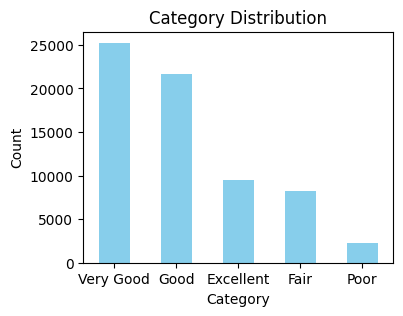

In [149]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['GENHLTH'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### MENTLHTH

In [150]:
df['MENTHLTH'].value_counts()

2.0           10335
5.0            8549
30.0           7475
3.0            6520
1.0            6225
10.0           6084
15.0           5101
4.0            3307
7.0            3008
20.0           2926
Don't Know     1324
25.0           1097
14.0            980
6.0             949
8.0             648
Refused         535
12.0            462
28.0            296
21.0            164
29.0            141
18.0            116
9.0              89
16.0             75
27.0             73
17.0             66
22.0             58
13.0             53
24.0             51
11.0             40
26.0             40
23.0             38
19.0              8
Name: MENTHLTH, dtype: int64

Just like before, there was some data that did not want to answer and did not know. We need to drop those two data.

In [151]:
df = df.loc[(df['MENTHLTH'] != "Don't Know") & (df['MENTHLTH'] != "Refused")]
df['MENTHLTH'] = df['MENTHLTH'].astype(float)

Now since all the data is numerical indicating the amount of stress in the last 30 days, we can plot the spread of the distribution through the following histogram plot.

<Axes: >

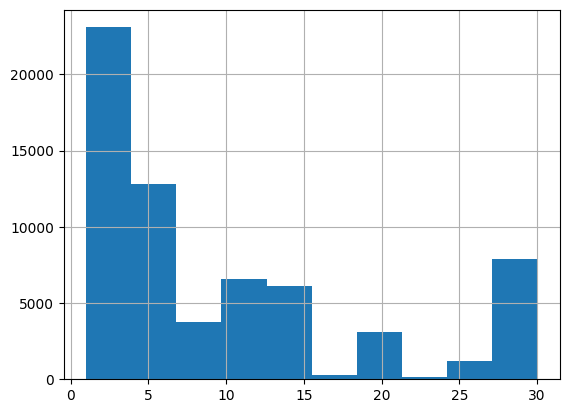

In [152]:
df['MENTHLTH'].hist()

### CHECKUP1

In [153]:
df['CHECKUP1'].value_counts()

Within the past year       48899
Within the past 2 years     9289
Within the past 5 years     4104
5 or more years ago         2230
Don't Know                   302
Never                        127
Refused                       23
Name: CHECKUP1, dtype: int64

This column indicates the last time a person had a medical checkup ranging from a year to never. Just like before, this column also has Dont Know and Refused values that need to be dropped.

In [154]:
df = df.loc[(df['CHECKUP1'] != "Don't Know") & (df['CHECKUP1'] != "Refused")]

Thus, a plot of the distribution of categories can be made

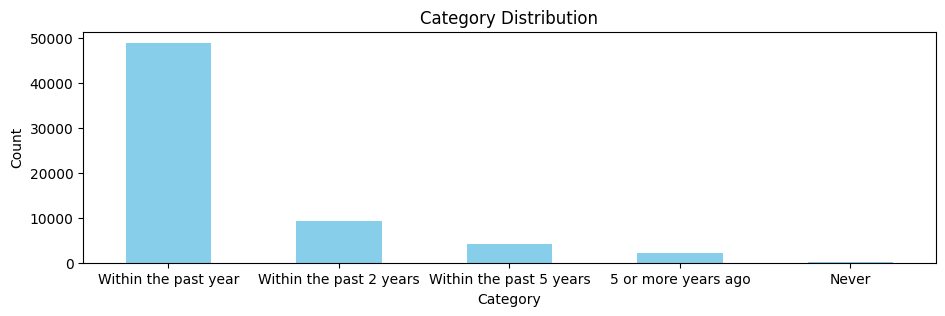

In [155]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['CHECKUP1'].value_counts()

# Plotting
plt.figure(figsize=(11, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### EXERANY2

In [156]:
df['EXERANY2'].value_counts()

Yes           52981
No            11613
Don't Know       44
Refused          11
Name: EXERANY2, dtype: int64

Furthermore, this column indicates whether or not you did any exercise in the past month. Like the previous column this column also has Dont Know and Refused values that need to be dropped.

In [157]:
df = df.loc[(df['EXERANY2'] != "Don't Know") & (df['EXERANY2'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

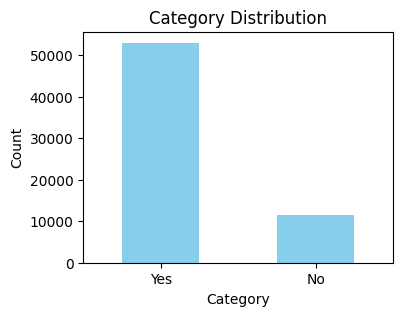

In [158]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['EXERANY2'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### BPHIGH6

In [159]:
df['BPHIGH6'].value_counts()

No                                            40771
Yes                                           22288
Told Borderline High BP                         759
Yes, but female told only during pregnancy      648
Don't Know                                      110
Refused                                          18
Name: BPHIGH6, dtype: int64

Just like the previous column, this column also has Dont Know and Refused values that need to be dropped.

In [160]:
df = df.loc[(df['BPHIGH6'] != "Don't Know") & (df['BPHIGH6'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

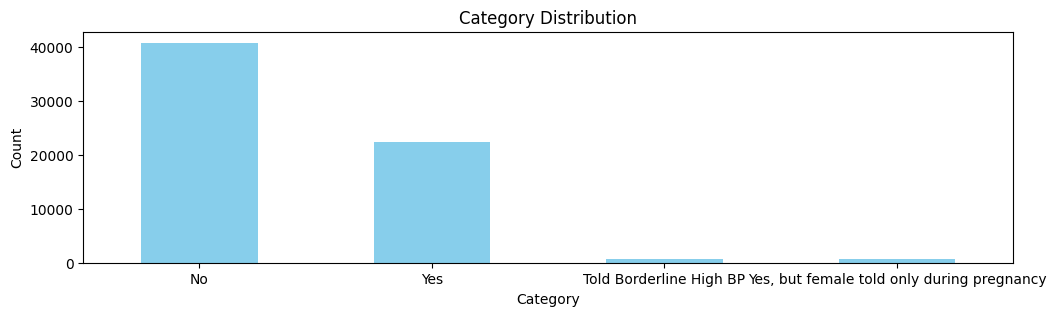

In [161]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['BPHIGH6'].value_counts()

# Plotting
plt.figure(figsize=(12, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### TOLDHI3

In [162]:
df['TOLDHI3'].value_counts()

No            40942
Yes           23145
Don't Know      357
Refused          22
Name: TOLDHI3, dtype: int64

Just like the previous column, this column also has Dont Know and Refused values that need to be dropped.

In [163]:
df = df.loc[(df['TOLDHI3'] != "Don't Know") & (df['TOLDHI3'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

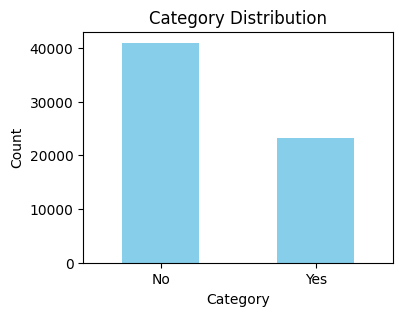

In [164]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['TOLDHI3'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [165]:
df.columns

Index(['GENHLTH', 'MENTHLTH', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'TOLDHI3',
       'DIABETE4', '_AGE80', 'WEIGHT2', 'HEIGHT3', 'SMOKE100', 'USENOW3',
       'ECIGNOW1', 'ALCDAY5', 'AVEDRNK3', 'MAXDRNKS', 'FRUIT2', 'FRUITJU2',
       'FVGREEN1', 'FRENCHF1', 'POTATOE1', 'VEGETAB2', 'SEXVAR', 'CVD'],
      dtype='object')

### DIABETE4

In [166]:
df['DIABETE4'].value_counts()

No                                            56150
Yes                                            5707
No, Borderline Diabetes                        1427
Yes, but female told only during pregnancy      747
Don't Know                                       52
Refused                                           4
Name: DIABETE4, dtype: int64

Just like the previous column, this column also has Dont Know and Refused values that need to be dropped.

In [167]:
df = df.loc[(df['DIABETE4'] != "Don't Know") & (df['DIABETE4'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

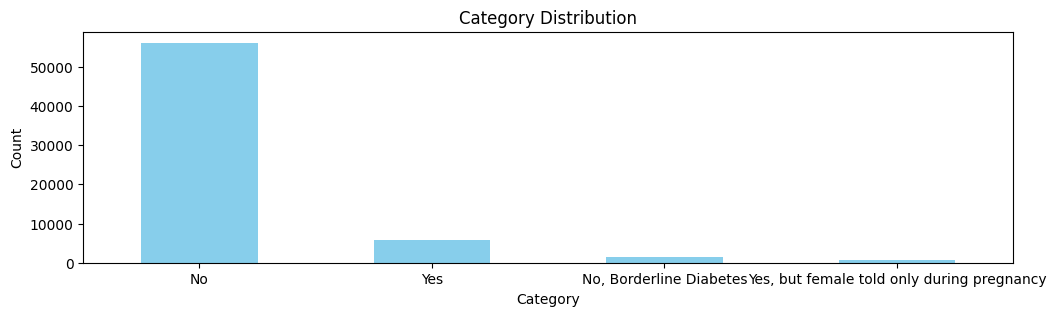

In [168]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['DIABETE4'].value_counts()

# Plotting
plt.figure(figsize=(12, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### _AGE80

Since this column already contains numerical data, a histogram plot of the data distribution can be done directly.

<Axes: >

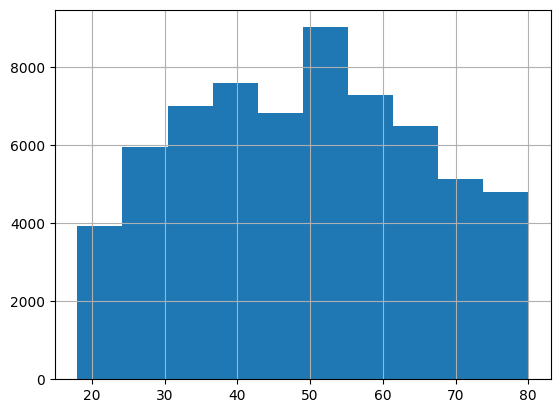

In [169]:
df['_AGE80'].hist()

### WEIGHT2

Just like the previous column, this column also has Dont Know and Refused values that need to be dropped.

In [170]:
df = df.loc[(df['WEIGHT2'] != "Don't Know") & (df['WEIGHT2'] != "Refused")]
df['WEIGHT2'] = df['WEIGHT2'].astype(float)

In this column, there are also numbers that do not make sense. There seems to be an error when inputting so that this nonsense number is dropped.

In [171]:
df[df['WEIGHT2'] > 300]['WEIGHT2']

1572     9055.0
1575     9079.0
1723     9090.0
1778     9060.0
1784     9079.0
          ...  
62851    9058.0
63159    9070.0
63324    9090.0
66386    9049.0
66866    9060.0
Name: WEIGHT2, Length: 130, dtype: float64

In [172]:
df['WEIGHT2'] = df[df['WEIGHT2'] <= 300]['WEIGHT2']

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

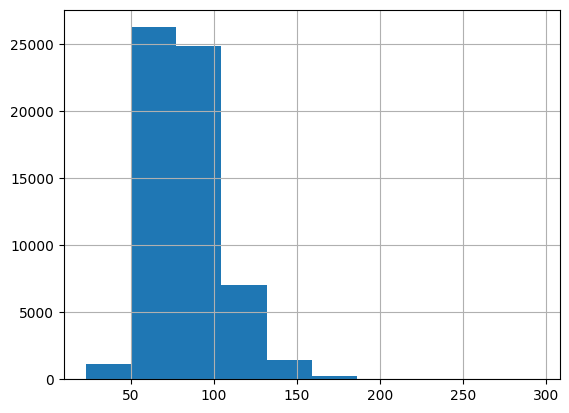

In [173]:
df['WEIGHT2'].hist()

### HEIGHT3

Just like in the weight column, there are numbers that do not make sense so it needs to be dropped. In addition, the Dont Know and Refused values also need to be dropped.

In [174]:
df = df.loc[(df['HEIGHT3'] != "Don't Know") & (df['HEIGHT3'] != "Refused")]
df['HEIGHT3'] = df['HEIGHT3'].astype(float)

In [175]:
df['HEIGHT3'] = df[df['HEIGHT3'] <= 250]['HEIGHT3']

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

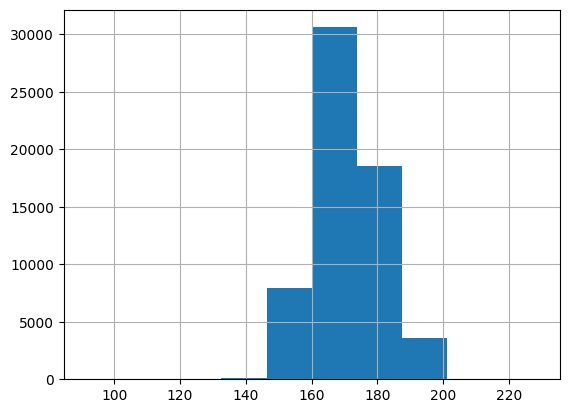

In [176]:
df['HEIGHT3'].hist()

### SMOKE100

Same as before the Dont Know and Refused values need to be dropped

In [177]:
df['SMOKE100'].value_counts()

No            35141
Yes           25641
Don't Know      209
Refused          18
Name: SMOKE100, dtype: int64

In [178]:
df = df.loc[(df['SMOKE100'] != "Don't Know") & (df['SMOKE100'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

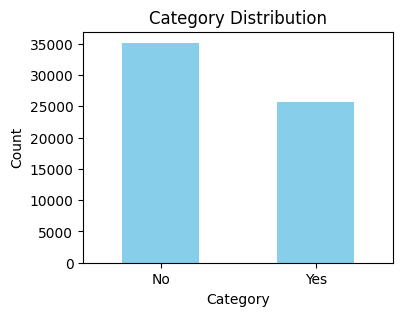

In [179]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['SMOKE100'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### USENOW3

Same as before the Dont Know and Refused values need to be dropped

In [180]:
df['USENOW3'].value_counts()

Not at all    58857
Every Day      1041
Some Days       859
Refused          13
Don't Know       12
Name: USENOW3, dtype: int64

In [181]:
df = df.loc[(df['USENOW3'] != "Don't Know") & (df['USENOW3'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

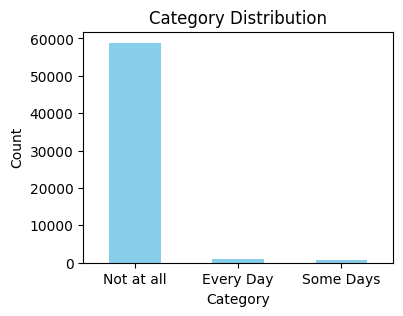

In [182]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['USENOW3'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### ECIGNOW1

Same as before the Dont Know and Refused values need to be dropped

In [183]:
df['ECIGNOW1'].value_counts()

Not at all           46197
Never used e-cigs    10203
Some Days             2401
Every Day             1930
Don't Know              15
Refused                 11
Name: ECIGNOW1, dtype: int64

In [184]:
df = df.loc[(df['ECIGNOW1'] != "Don't Know") & (df['ECIGNOW1'] != "Refused")]

Here's the category distribution plot after the two unwanted values are dropped

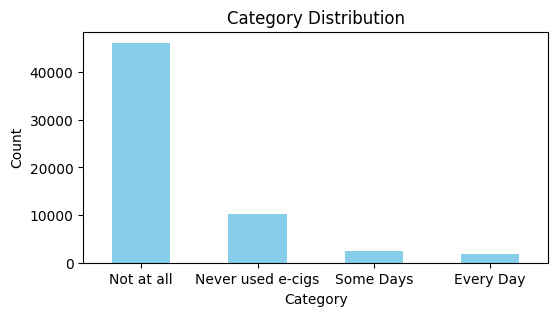

In [185]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['ECIGNOW1'].value_counts()

# Plotting
plt.figure(figsize=(6, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### ALCDAY5

Since this column already contains numerical data, a histogram plot of the data distribution can be done directly.

<Axes: >

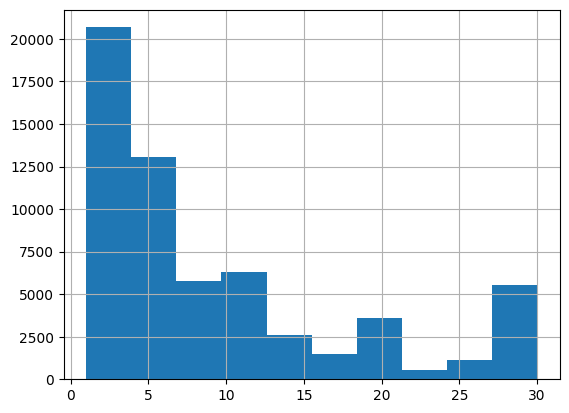

In [186]:
df['ALCDAY5'].hist()

### AVEDRNK3

Same as before the Dont Know and Refused values need to be dropped

In [260]:
df['AVEDRNK3'].value_counts()

1     24692
2     18454
3      7435
4      3070
5      1612
6      1290
77      465
10      438
8       383
7       273
12      196
15       91
20       51
9        47
30       42
16       17
24       16
11       16
25       14
14       13
18       13
13        8
76        7
17        4
40        4
50        3
60        3
36        3
45        2
28        2
19        1
23        1
74        1
35        1
37        1
56        1
70        1
48        1
Name: AVEDRNK3, dtype: int64

In [261]:
df = df.loc[(df['AVEDRNK3'] != "Don't Know") & (df['AVEDRNK3'] != "Refused")]
df['AVEDRNK3'] = df['AVEDRNK3'].astype(float)
df['AVEDRNK3'] = df['AVEDRNK3'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

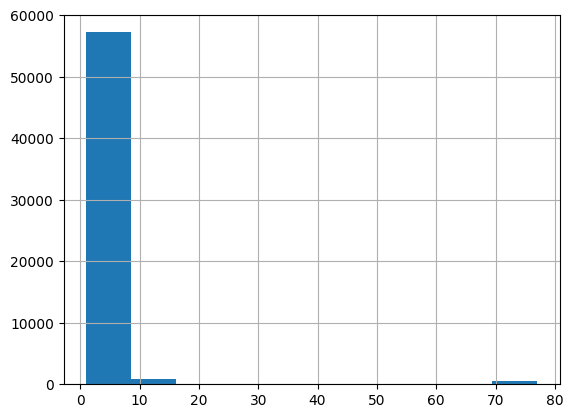

In [262]:
df['AVEDRNK3'].hist()

### MAXDRNKS

Same as before the Dont Know and Refused values need to be dropped

In [187]:
df['MAXDRNKS'].value_counts()

2.0        15519
1.0        14943
3.0         9713
4.0         5642
5.0         4076
6.0         3373
8.0         1413
10.0        1307
7.0         1248
77.0        1229
12.0         775
15.0         279
9.0          272
Refused      209
20.0         195
30.0          72
18.0          66
14.0          66
11.0          55
16.0          49
13.0          45
25.0          40
24.0          35
17.0          25
50.0          10
40.0           9
28.0           7
23.0           6
32.0           5
21.0           5
22.0           4
34.0           3
45.0           3
35.0           3
26.0           3
60.0           3
36.0           3
76.0           3
48.0           3
19.0           3
43.0           2
47.0           2
70.0           2
33.0           1
27.0           1
56.0           1
37.0           1
53.0           1
42.0           1
Name: MAXDRNKS, dtype: int64

In [188]:
df = df.loc[(df['MAXDRNKS'] != "Don't Know") & (df['MAXDRNKS'] != "Refused")]
df['MAXDRNKS'] = df['MAXDRNKS'].astype(float)
df['MAXDRNKS'] = df['MAXDRNKS'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

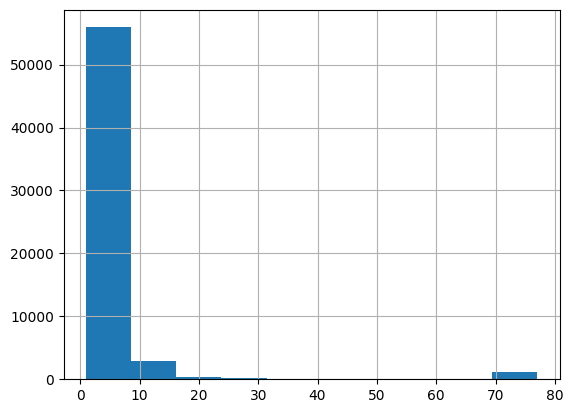

In [189]:
df['MAXDRNKS'].hist()

### FRUIT2

In this column, feature engineering has to be done because it turns out that there is data where someone never consumes fruits and has consumed fruits but less than once a month. For those who never consume fruit will be encoded into a value of -1 and those who consume fruit less than once a month will be given a value of 0. Furthermore, the value of Dont Know and Refused will be dropped as in other columns.

In [190]:
df[df['FRUIT2'].astype(str).str.contains('[a-zA-Z]')]['FRUIT2'].value_counts()

Never                     1263
Don't Know                 381
Less than once a month     304
Refused                     34
Name: FRUIT2, dtype: int64

In [193]:
df = df.loc[(df['FRUIT2'] != "Don't Know") & (df['FRUIT2'] != "Refused")]

# Define a function to encode fruit consumption
def encode_fruit_consumption(value):
    if value == 'Never':
        return -1
    elif value == 'Less than once a month':
        return 0
    else:
        return value

df['FRUIT2'] = df['FRUIT2'].apply(encode_fruit_consumption)
df['FRUIT2'] = df['FRUIT2'].astype(float)
df['FRUIT2'] = df['FRUIT2'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

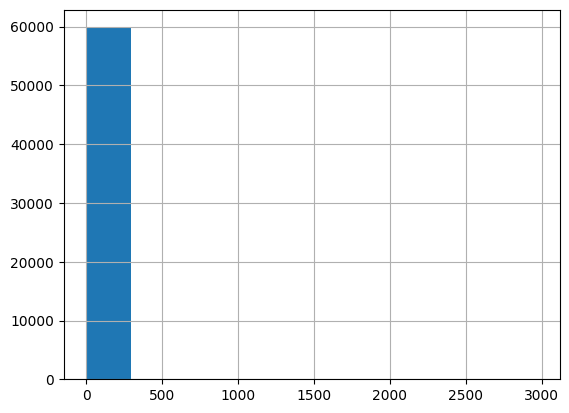

In [227]:
df['FRUIT2'].hist()

Based on the histogram plot, the distribution is very uneven. For now, it will be left as is

### FRUITJU2

This column is treated similarly as before

In [229]:
df[df['FRUITJU2'].astype(str).str.contains('[a-zA-Z]')]['FRUITJU2'].value_counts()

Never                     24617
Less than once a month     2128
Don't Know                  407
Refused                      25
Name: FRUITJU2, dtype: int64

In [230]:
df = df.loc[(df['FRUITJU2'] != "Don't Know") & (df['FRUITJU2'] != "Refused")]

df['FRUITJU2'] = df['FRUITJU2'].apply(encode_fruit_consumption)
df['FRUITJU2'] = df['FRUITJU2'].astype(float)
df['FRUITJU2'] = df['FRUITJU2'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

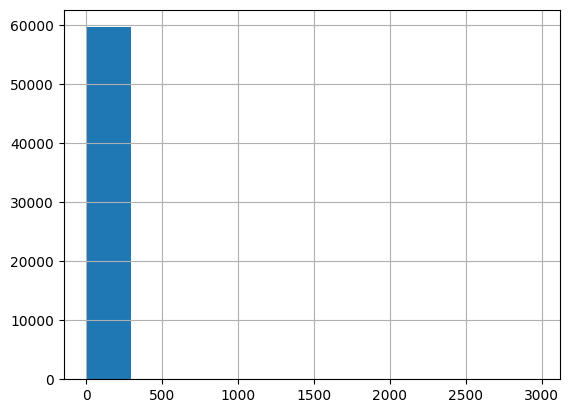

In [231]:
df['FRUITJU2'].hist()

Based on the histogram plot, the distribution is very uneven. For now, it will be left as is

### FVGREEN1

This column is treated similarly as before

In [235]:
df[df['FVGREEN1'].astype(str).str.contains('[a-zA-Z]')]['FVGREEN1'].value_counts()

Never                     2924
Less than once a month     487
Don't Know                 204
Refused                     18
Name: FVGREEN1, dtype: int64

In [236]:
df = df.loc[(df['FVGREEN1'] != "Don't Know") & (df['FVGREEN1'] != "Refused")]

df['FVGREEN1'] = df['FVGREEN1'].apply(encode_fruit_consumption)
df['FVGREEN1'] = df['FVGREEN1'].astype(float)
df['FVGREEN1'] = df['FVGREEN1'].astype(int)

C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_20984\2555090089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FVGREEN1'] = df['FVGREEN1'].apply(encode_fruit_consumption)
C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_20984\2555090089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FVGREEN1'] = df['FVGREEN1'].astype(float)
C:\Users\Bagus_Raka\AppData\Local\Temp\ipykernel_20984\2555090089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

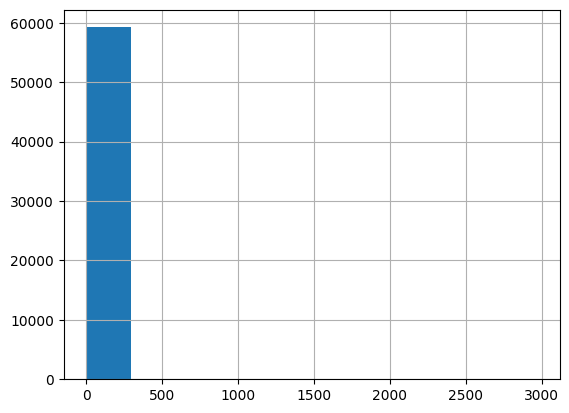

In [237]:
df['FVGREEN1'].hist()

Based on the histogram plot, the distribution is very uneven. For now, it will be left as is

### FRENCHF1

This column is treated similarly as before

In [238]:
df[df['FRENCHF1'].astype(str).str.contains('[a-zA-Z]')]['FRENCHF1'].value_counts()

Never                     5777
Less than once a month     955
Don't Know                 168
Refused                     18
Name: FRENCHF1, dtype: int64

In [239]:
df = df.loc[(df['FRENCHF1'] != "Don't Know") & (df['FRENCHF1'] != "Refused")]

df['FRENCHF1'] = df['FRENCHF1'].apply(encode_fruit_consumption)
df['FRENCHF1'] = df['FRENCHF1'].astype(float)
df['FRENCHF1'] = df['FRENCHF1'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

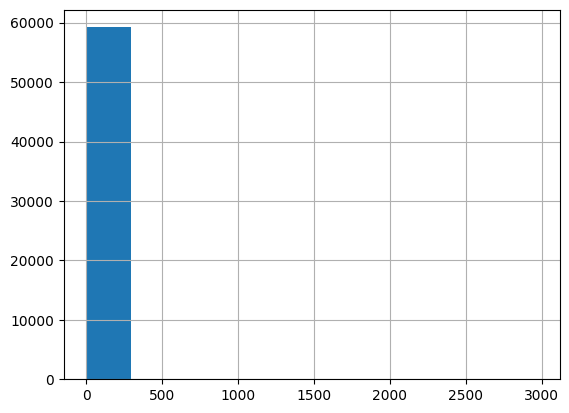

In [240]:
df['FRENCHF1'].hist()

Based on the histogram plot, the distribution is very uneven. For now, it will be left as is

### POTATOE1

This column is treated similarly as before

In [241]:
df[df['POTATOE1'].astype(str).str.contains('[a-zA-Z]')]['POTATOE1'].value_counts()

Never                     6375
Less than once a month    1071
Don't Know                 304
Refused                     15
Name: POTATOE1, dtype: int64

In [242]:
df = df.loc[(df['POTATOE1'] != "Don't Know") & (df['POTATOE1'] != "Refused")]

df['POTATOE1'] = df['POTATOE1'].apply(encode_fruit_consumption)
df['POTATOE1'] = df['POTATOE1'].astype(float)
df['POTATOE1'] = df['POTATOE1'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

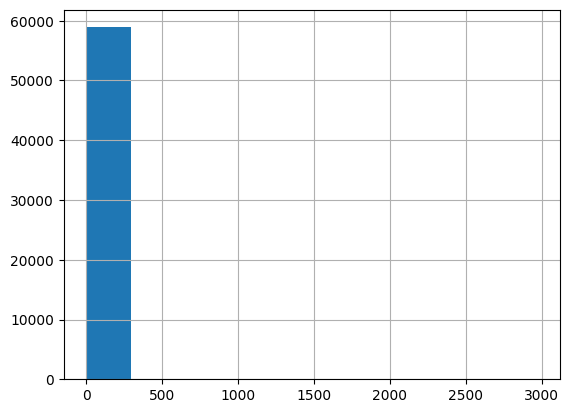

In [243]:
df['POTATOE1'].hist()

Based on the histogram plot, the distribution is very uneven. For now, it will be left as is

### VEGETAB2

This column is treated similarly as before

In [244]:
df[df['VEGETAB2'].astype(str).str.contains('[a-zA-Z]')]['VEGETAB2'].value_counts()

Never                     923
Less than once a month    220
Don't Know                191
Refused                    23
Name: VEGETAB2, dtype: int64

In [245]:
df = df.loc[(df['VEGETAB2'] != "Don't Know") & (df['VEGETAB2'] != "Refused")]

df['VEGETAB2'] = df['VEGETAB2'].apply(encode_fruit_consumption)
df['VEGETAB2'] = df['VEGETAB2'].astype(float)
df['VEGETAB2'] = df['VEGETAB2'].astype(int)

Here's the data distribution plot after the two unwanted values are removed

<Axes: >

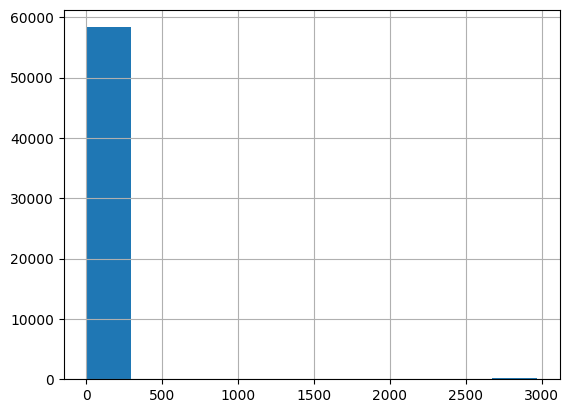

In [246]:
df['VEGETAB2'].hist()

Based on the histogram plot, the distribution is very uneven. For now, it will be left as is

### SEXVAR

Because the data has been categorised well, plotting can be done directly.

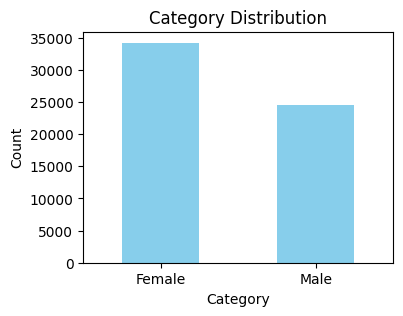

In [249]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['SEXVAR'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### CVD

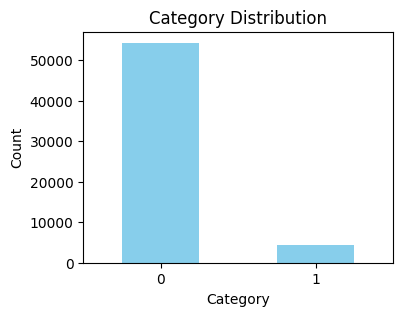

In [278]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
df['CVD'] = df['CVD'].astype(int)
category_counts = df['CVD'].value_counts()

# Plotting
plt.figure(figsize=(4, 3))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

This column is the target column. It can be seen that the data is imbalanced. The handling of imbalanced data will be done during the modelling stage.

## Bi Variate Analysis

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58672 entries, 0 to 66946
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GENHLTH   58672 non-null  object 
 1   MENTHLTH  58672 non-null  float64
 2   CHECKUP1  58672 non-null  object 
 3   EXERANY2  58672 non-null  object 
 4   BPHIGH6   58672 non-null  object 
 5   TOLDHI3   58672 non-null  object 
 6   DIABETE4  58672 non-null  object 
 7   _AGE80    58672 non-null  float64
 8   WEIGHT2   58552 non-null  float64
 9   HEIGHT3   58524 non-null  float64
 10  SMOKE100  58672 non-null  object 
 11  USENOW3   58672 non-null  object 
 12  ECIGNOW1  58672 non-null  object 
 13  ALCDAY5   58672 non-null  int64  
 14  AVEDRNK3  58672 non-null  int32  
 15  MAXDRNKS  58672 non-null  int32  
 16  FRUIT2    58672 non-null  int32  
 17  FRUITJU2  58672 non-null  int32  
 18  FVGREEN1  58672 non-null  int32  
 19  FRENCHF1  58672 non-null  int32  
 20  POTATOE1  58672 non-null  in

Based on the previous EDA, it was found that there are 10 categorical columns and 13 numerical columns. Next, a bivariate analysis will be conducted based on that two types of columns.

In [280]:
categorical_columns = ['GENHLTH', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'TOLDHI3', 'DIABETE4', 'SMOKE100', 'USENOW3', 
                       'ECIGNOW1', 'SEXVAR']
numerical_columns = list(set(list(df.columns)) - set(categorical_columns + ['CVD']))
print(categorical_columns)
print(numerical_columns)

['GENHLTH', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'TOLDHI3', 'DIABETE4', 'SMOKE100', 'USENOW3', 'ECIGNOW1', 'SEXVAR']
['FRUITJU2', 'WEIGHT2', 'HEIGHT3', 'AVEDRNK3', 'FRENCHF1', 'MAXDRNKS', 'VEGETAB2', 'ALCDAY5', 'POTATOE1', 'FVGREEN1', 'FRUIT2', '_AGE80', 'MENTHLTH']


### Categorical Columns vs Target Column

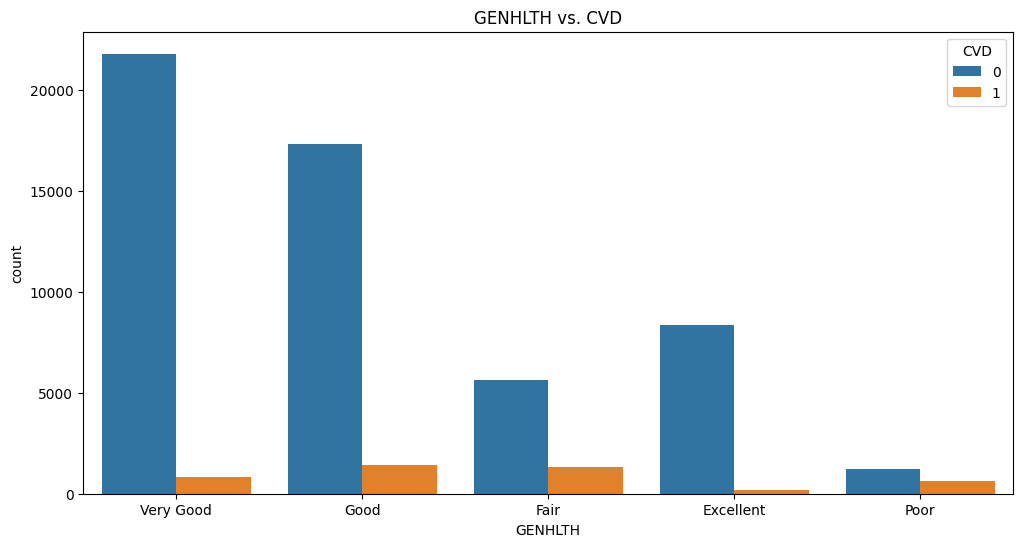

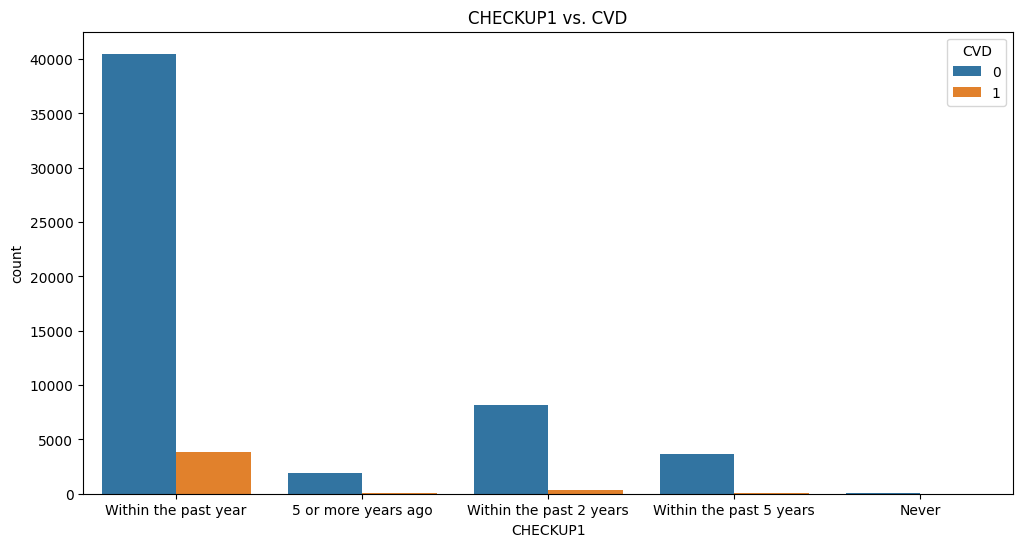

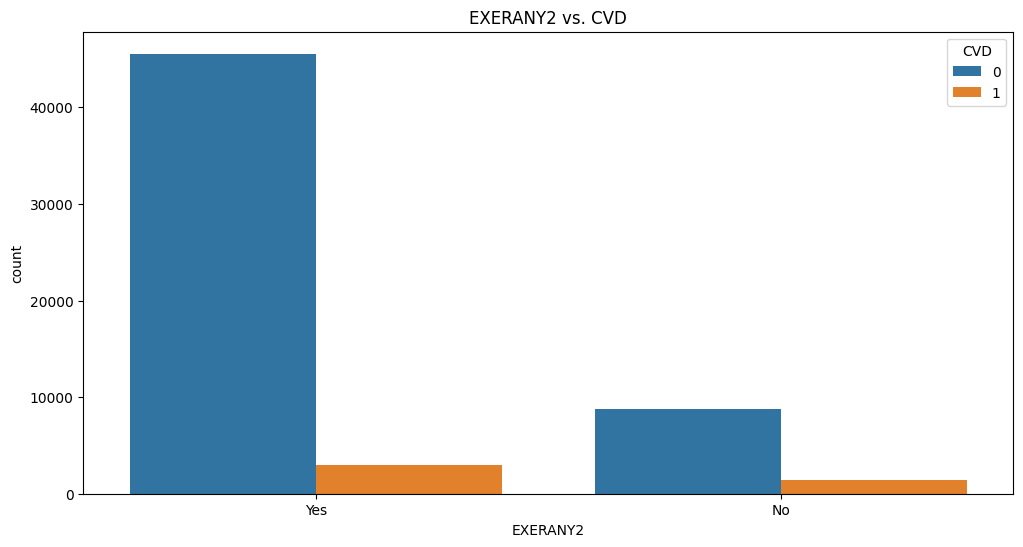

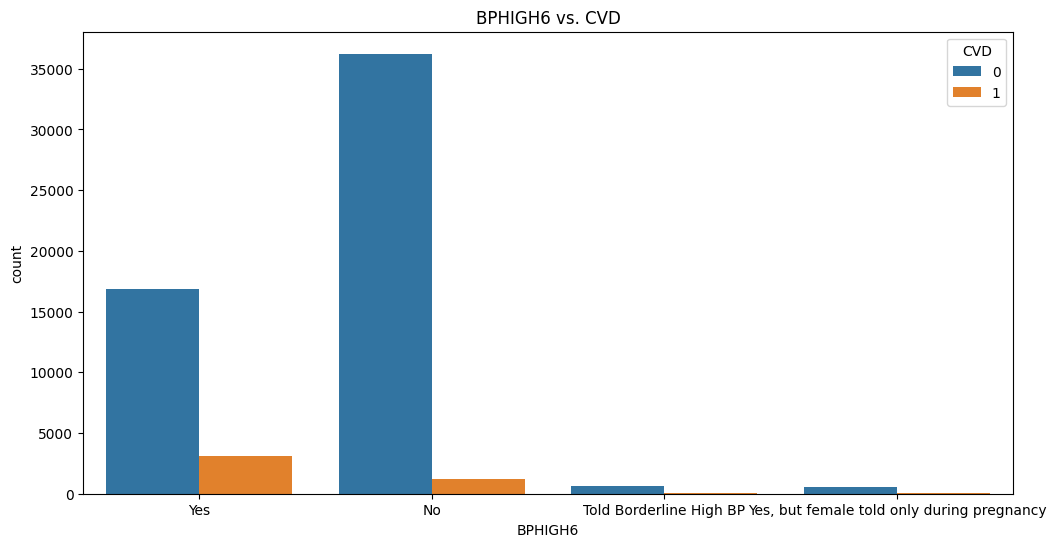

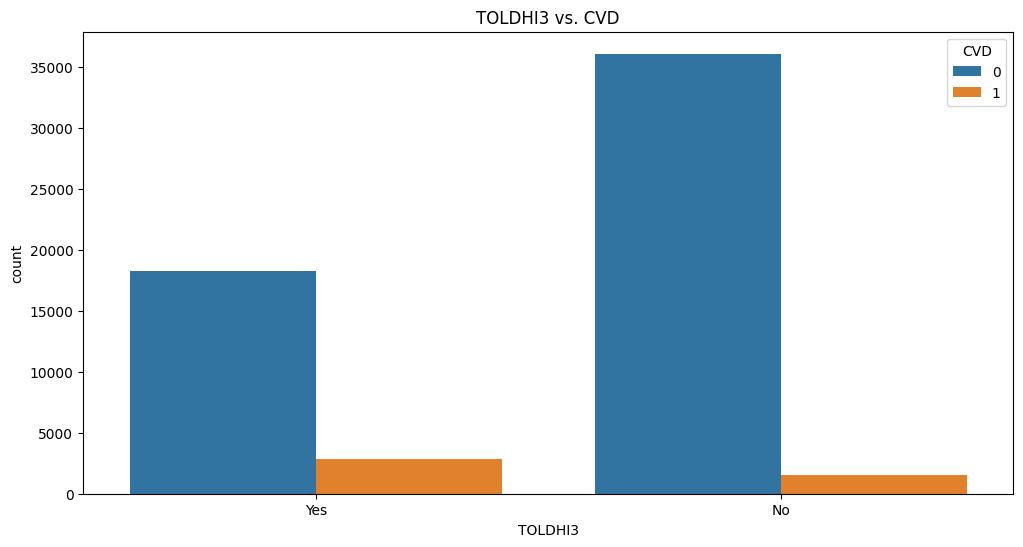

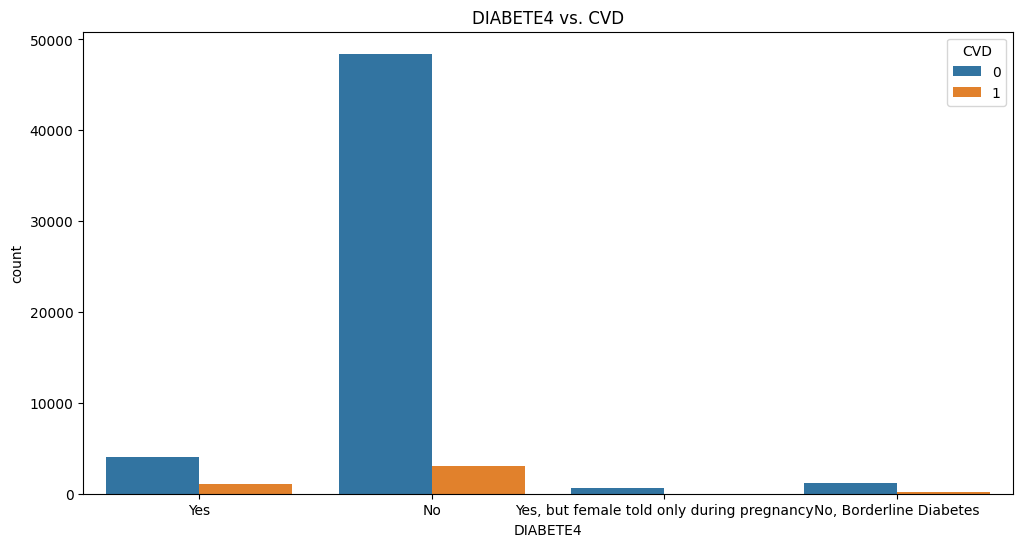

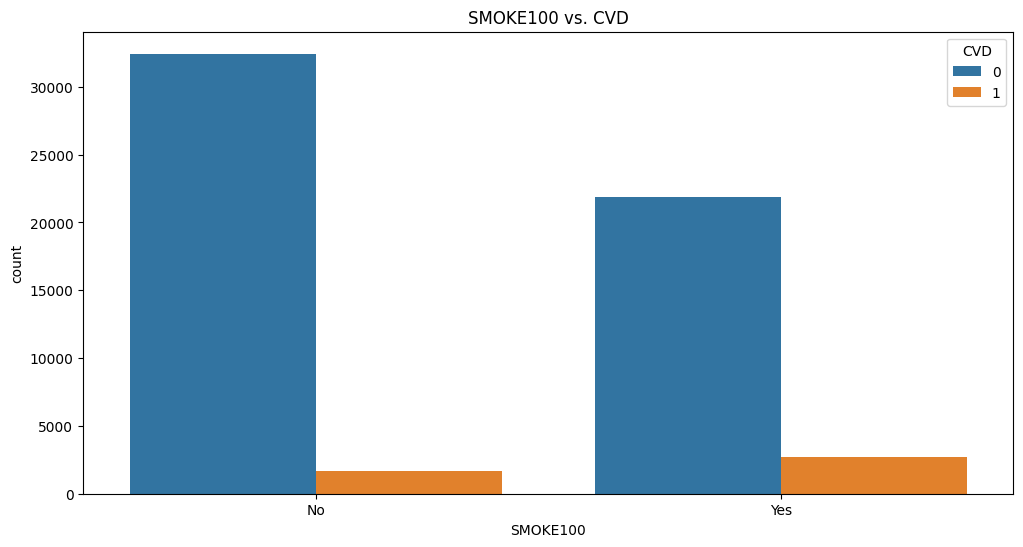

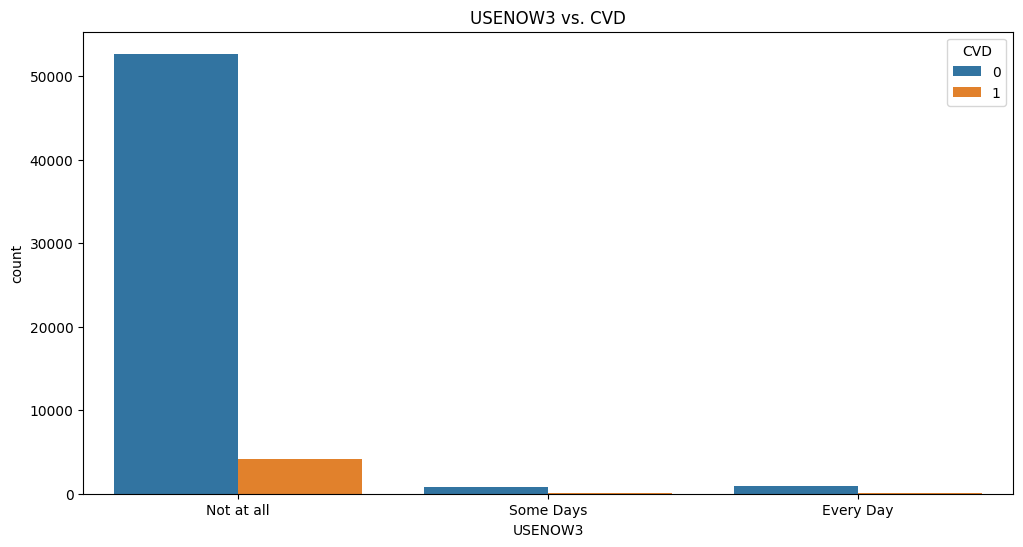

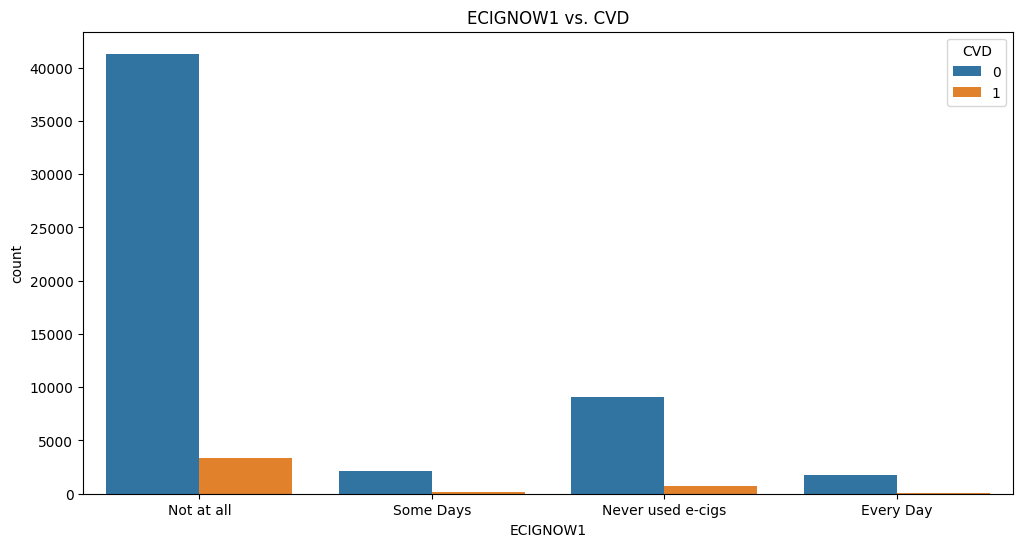

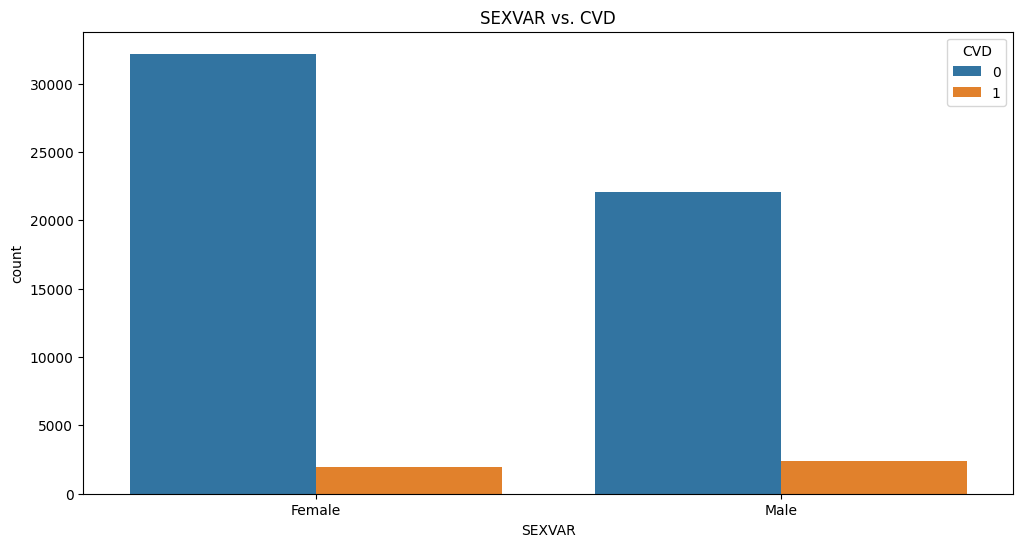

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over categorical columns
for cat_col in categorical_columns:
    # Categorical vs. Target
    plt.figure(figsize=(12, 6))
    sns.countplot(x=cat_col, hue='CVD', data=df)
    plt.title(f'{cat_col} vs. CVD')
    plt.show()

### Numerical Columns vs Target Column

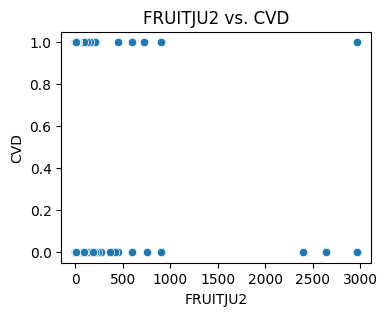

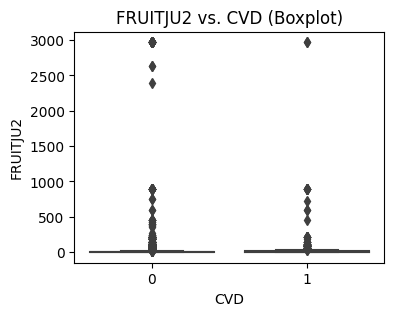

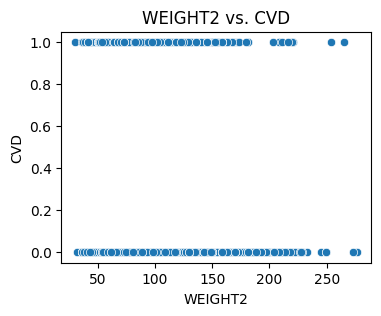

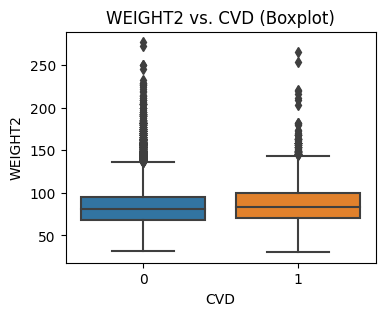

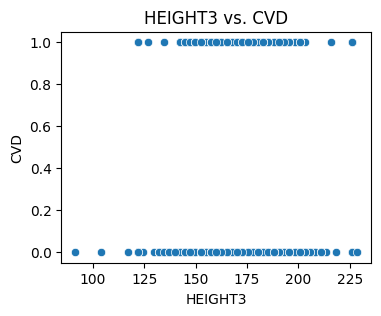

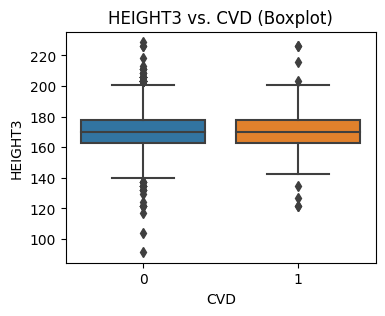

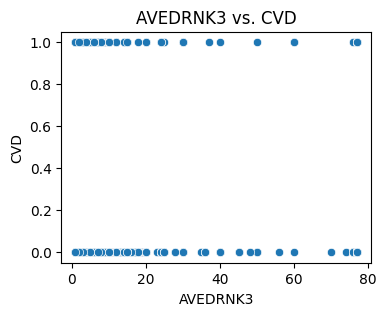

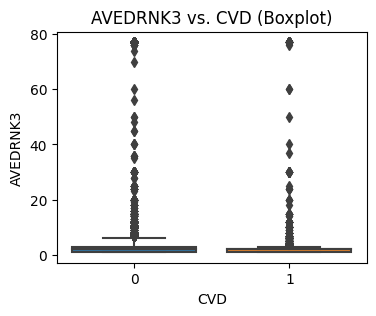

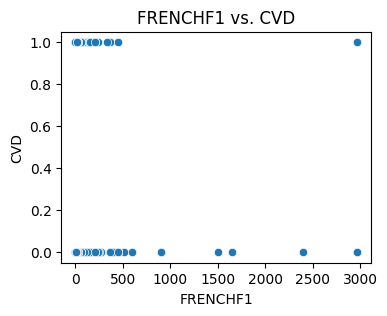

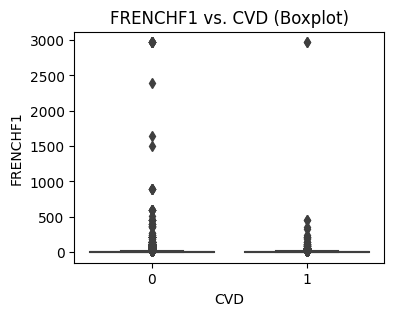

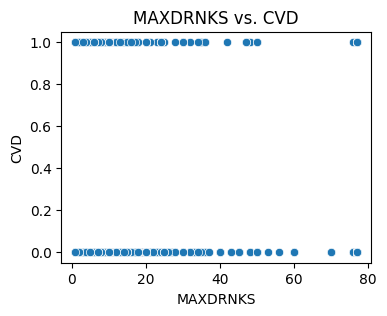

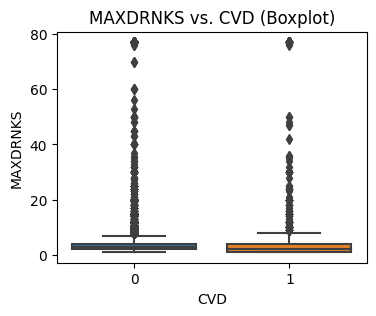

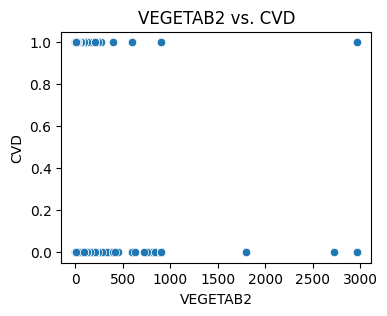

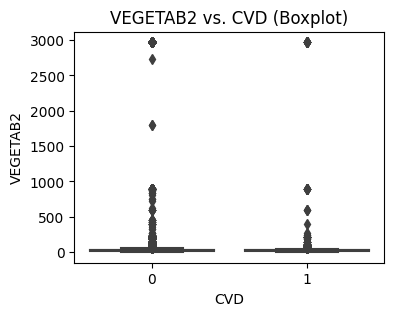

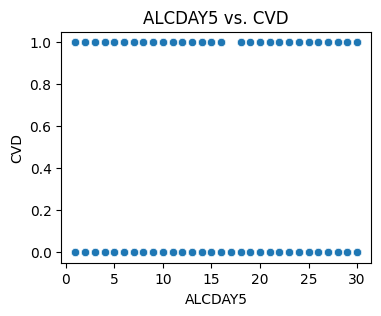

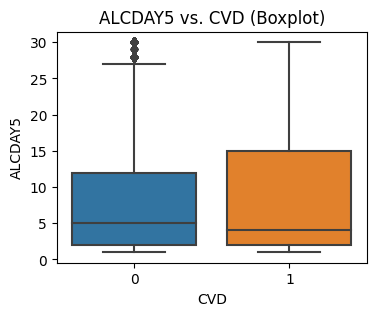

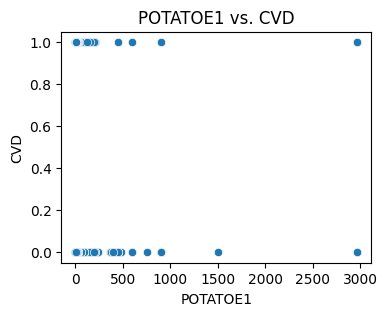

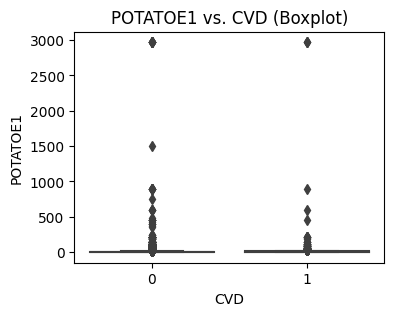

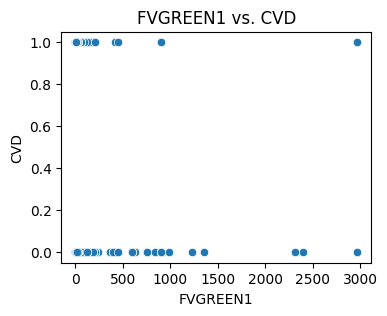

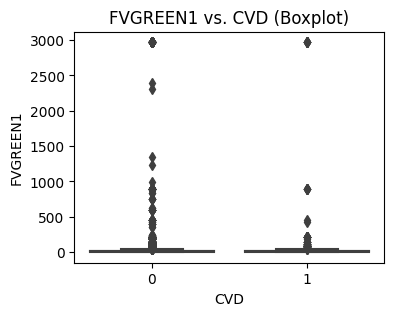

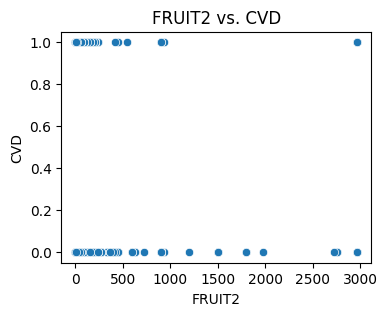

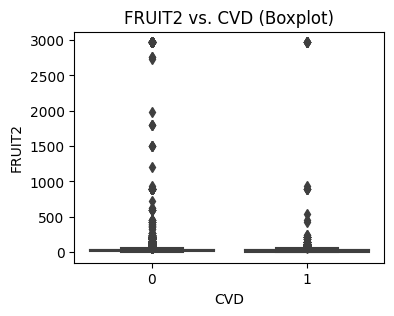

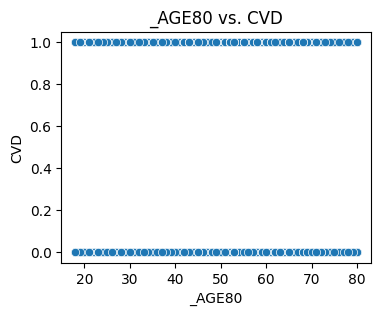

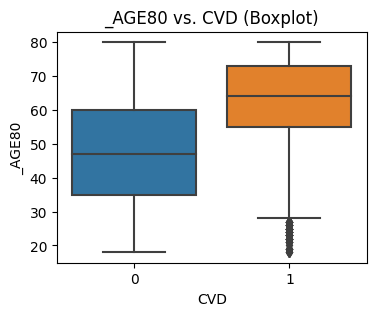

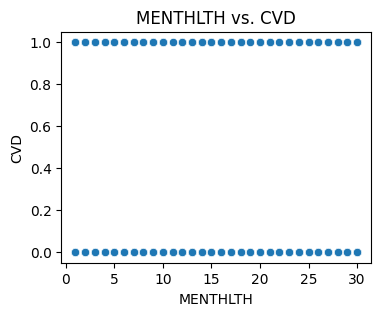

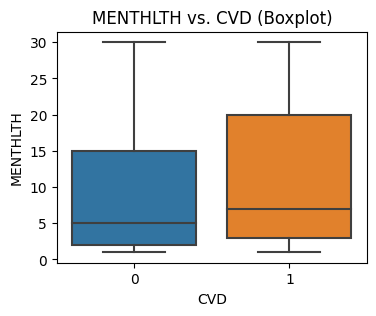

In [285]:
# Iterate over numerical columns
for num_col in numerical_columns:
    # Numerical vs. Target
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=num_col, y='CVD', data=df)
    plt.title(f'{num_col} vs. CVD')
    plt.show()
    
    # Box plot for numerical vs. Target
    plt.figure(figsize=(4, 3))
    sns.boxplot(x='CVD', y=num_col, data=df)
    plt.title(f'{num_col} vs. CVD (Boxplot)')
    plt.show()

As a result of the bivariate analysis, each variable does not directly show a positive correlation or negative correlation. However, there are some variables that have shown a tendency to positive or negative correlation. It may be necessary to use multiple variables to make good predictions.

# Feature Engineering